In [1]:
data_path = '/Users/parkchungho/Desktop/23-2/Big Data Capstone Design 1/관련자료/'

In [2]:
import pandas as pd

In [3]:
df = pd.read_excel(data_path + '물류창고정보_위치기반_231115.xls')
df = df.drop(['Unnamed: 5','Unnamed: 7'], axis=1)
col_name = list(df.iloc[1,:])
col_name[0:3] = df.columns[0:3]
df.columns = col_name
df = df.iloc[2:,].reset_index().drop(['index'], axis=1)
df = df.drop(['동수'], axis=1)

In [4]:
df.head()

,상호명,성명,소재지,일반창고,냉동냉장,항만창고,보세창고,보관저장업,냉동냉장,축산물보관,냉동냉장
0,삼성전자로지텍,최수영,강원특별자치도 원주시 문막읍 반계리 1093번지 1호,4039,0,0,0,0,0,0,0
1,삼성전자로지텍㈜,최수영,세종특별자치시 부강면 갈산리 470번지 2호,8264.5,0,0,0,0,0,0,0
2,씨제이대한통운㈜ 남강원지사,강신호,강원특별자치도 원주시 흥업면 사제리 1339번지 1호,2430.08,0,0,0,0,0,0,0
3,주식회사 엘엑스판토스,최원혁,강원특별자치도 원주시 문막읍 동화리 608번지 42호,2953,0,0,0,0,0,0,0
4,씨제이대한통운 주식회사,강신호,강원특별자치도 원주시 호저면 주산리 275번지,2764,0,0,0,0,0,0,0


In [5]:
import urllib.request
import urllib.parse
import json
from tqdm import tqdm_notebook

In [6]:
vworld_key='82165070-4BB7-3196-88C8-EABFD5069A9C'

In [7]:
# 경북 지역 창고, 울릉도 제외
gb_df = df[df['소재지'].str.contains('경상북도|대구광역')]
gb_df = gb_df[~gb_df['소재지'].str.contains('울릉')].reset_index().drop(['index'], axis=1)
gb_df

,상호명,성명,소재지,일반창고,냉동냉장,항만창고,보세창고,보관저장업,냉동냉장,축산물보관,냉동냉장
0,경동물류(주),백영길,경상북도 칠곡군 연화리 700번지 영남종합물류 화물취급장 사동,3644,0,0,0,0,0,0,0
1,합동물류(주),백영창,경상북도 칠곡군 지천면 연화리 700번지 영남복합물류 사동,1797,0,0,0,0,0,0,0
2,씨제이대한통운(주),강신호,경상북도 칠곡군 가산면 다부리 445번지,3495,0,0,0,0,0,0,0
3,롯데하이마트(주),남창희,경상북도 칠곡군 왜관읍 금산리 390번지 외 1필지,11364,0,0,0,0,0,0,0
4,씨제이대한통운(주),강신호,대구광역시 달서구 장동 306번지 111호,2049.44,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
317,(주)한익스프레스경북센터,유인철 외 1명,경상북도 칠곡군 지천면 금호로1길 2-13,0,0,0,0,0,234,0,0
318,에이스후레쉬(주) 칠곡,전윤석,경상북도 칠곡군 지천면 산단터널로 240,0,0,0,0,0,1765,0,0
319,(주)한익스프레스칠곡센터,유인철 외 1명,경상북도 칠곡군 지천면 금호로 356,0,0,0,0,0,982.06,0,0
320,(주)포항국제물류센터 냉동창고,전성곤,경상북도 포항시 북구 흥해읍 영일만항로 236,0,0,0,0,0,6654.34,0,0


In [8]:
sum = gb_df.iloc[:,3:].sum(axis=1)
gb_df['창고규모 합(m²)'] = sum
gb_df

,상호명,성명,소재지,일반창고,냉동냉장,항만창고,보세창고,보관저장업,냉동냉장,축산물보관,냉동냉장,창고규모 합(m²)
0,경동물류(주),백영길,경상북도 칠곡군 연화리 700번지 영남종합물류 화물취급장 사동,3644,0,0,0,0,0,0,0,3644.00
1,합동물류(주),백영창,경상북도 칠곡군 지천면 연화리 700번지 영남복합물류 사동,1797,0,0,0,0,0,0,0,1797.00
2,씨제이대한통운(주),강신호,경상북도 칠곡군 가산면 다부리 445번지,3495,0,0,0,0,0,0,0,3495.00
3,롯데하이마트(주),남창희,경상북도 칠곡군 왜관읍 금산리 390번지 외 1필지,11364,0,0,0,0,0,0,0,11364.00
4,씨제이대한통운(주),강신호,대구광역시 달서구 장동 306번지 111호,2049.44,0,0,0,0,0,0,0,2049.44
...,...,...,...,...,...,...,...,...,...,...,...,...
317,(주)한익스프레스경북센터,유인철 외 1명,경상북도 칠곡군 지천면 금호로1길 2-13,0,0,0,0,0,234,0,0,234.00
318,에이스후레쉬(주) 칠곡,전윤석,경상북도 칠곡군 지천면 산단터널로 240,0,0,0,0,0,1765,0,0,1765.00
319,(주)한익스프레스칠곡센터,유인철 외 1명,경상북도 칠곡군 지천면 금호로 356,0,0,0,0,0,982.06,0,0,982.06
320,(주)포항국제물류센터 냉동창고,전성곤,경상북도 포항시 북구 흥해읍 영일만항로 236,0,0,0,0,0,6654.34,0,0,6654.34


In [9]:
# 도로명 주소
for i in tqdm_notebook(gb_df.index):
    req_url='http://api.vworld.kr/req/address?service=address&type=road&request=getCoord&key='+vworld_key+'&address='+urllib.parse.quote(gb_df.at[i,'소재지'])
    req=urllib.request.Request(req_url)
    try:
        response=urllib.request.urlopen(req)
        if response.getcode()==200:
            json_data=json.loads(response.read())

            gb_df.at[i,'경도']=json_data['response']['result']['point']['x']
            gb_df.at[i,'위도']=json_data['response']['result']['point']['y']
        else: # TIME-OUT 400, SERVER FAIL 500
            print('응답 없음: '+str(response.getcode()))
            break
    except Exception as e: # 에러 난 것은 원인만 프린트하고 건너뛰고 다음 데이터 처리할 때 
        print('Error:%s[%s]'%(e,gb_df.at[i,'상호명']))
    else:
        print(f"Index {i} not found in gb_df.")

/var/folders/gh/fyvtb6_j1pd8scl6whkw_fj80000gn/T/ipykernel_38475/3036348063.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(gb_df.index):


  0%|          | 0/322 [00:00<?, ?it/s]

Error:'result'[경동물류(주)]
Error:'result'[합동물류(주)]
Error:'result'[씨제이대한통운(주)]
Error:'result'[롯데하이마트(주)]
Error:'result'[씨제이대한통운(주)]
Error:'result'[(주)한진]
Error:'result'[(주)지오팜]
Error:'result'[(주)판토스]
Error:'result'[(주)영원무역]
Error:'result'[대산농협]
Index 10 not found in gb_df.
Error:'result'[김천유통영농조합법인]
Error:'result'[로젠(주)]
Error:'result'[건영화물(주)]
Error:'result'[물레방아(94호)]
Error:'result'[롯데글로벌로지스(주)]
Error:'result'[(주)코리아대동]
Index 17 not found in gb_df.
Error:'result'[씨제이대한통운(주)]
Error:'result'[한국농수산식품유통공사]
Error:'result'[씨제이대한통운(주)]
Error:'result'[동원로엑스(주)]
Error:'result'[(주)대한냉동]
Error:'result'[(주)한진]
Error:'result'[롯데글로벌로지스(주)]
Error:'result'[우보대창창고]
Error:'result'[진한종합물류(주)]
Index 27 not found in gb_df.
Index 28 not found in gb_df.
Index 29 not found in gb_df.
Index 30 not found in gb_df.
Index 31 not found in gb_df.
Index 32 not found in gb_df.
Error:'result'[씨제이대한통운]
Error:'result'[(주)세아엘앤에스]
Error:'result'[동원로엑스(주)]
Error:'result'[(주)삼일]
Error:'result'[(주)천일티엘에스]
Error:'result'[케이티링커스(

In [10]:
# 지번 주소
for i in tqdm_notebook(gb_df.index):
    req_url='http://api.vworld.kr/req/address?service=address&type=parcel&request=getCoord&key='+vworld_key+'&address='+urllib.parse.quote(gb_df.at[i,'소재지'])
    req=urllib.request.Request(req_url)
    try:
        response=urllib.request.urlopen(req)
        if response.getcode()==200:
            json_data=json.loads(response.read())

            gb_df.at[i,'경도']=json_data['response']['result']['point']['x']
            gb_df.at[i,'위도']=json_data['response']['result']['point']['y']
        else: # TIME-OUT 400, SERVER FAIL 500
            print('응답 없음: '+str(response.getcode()))
            break
    except Exception as e: # 에러 난 것은 원인만 프린트하고 건너뛰고 다음 데이터 처리할 때 
        print('Error:%s[%s]'%(e,gb_df.at[i,'상호명']))
    else:
        print(f"Index {i} not found in gb_df.")

/var/folders/gh/fyvtb6_j1pd8scl6whkw_fj80000gn/T/ipykernel_38475/2983723874.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(gb_df.index):


  0%|          | 0/322 [00:00<?, ?it/s]

Index 0 not found in gb_df.
Index 1 not found in gb_df.
Index 2 not found in gb_df.
Index 3 not found in gb_df.
Index 4 not found in gb_df.
Index 5 not found in gb_df.
Index 6 not found in gb_df.
Error:'result'[(주)판토스]
Index 8 not found in gb_df.
Index 9 not found in gb_df.
Error:'result'[김천유통영농조합법인]
Index 11 not found in gb_df.
Index 12 not found in gb_df.
Index 13 not found in gb_df.
Index 14 not found in gb_df.
Index 15 not found in gb_df.
Index 16 not found in gb_df.
Index 17 not found in gb_df.
Index 18 not found in gb_df.
Index 19 not found in gb_df.
Error:'result'[씨제이대한통운(주)]
Index 21 not found in gb_df.
Index 22 not found in gb_df.
Index 23 not found in gb_df.
Index 24 not found in gb_df.
Index 25 not found in gb_df.
Error:'result'[진한종합물류(주)]
Index 27 not found in gb_df.
Error:'result'[(주)엘엑스판토스]
Error:'result'[어신창고]
Error:'result'[동광기업사]
Error:'result'[괴당창고]
Error:'result'[낙상창고]
Index 33 not found in gb_df.
Index 34 not found in gb_df.
Index 35 not found in gb_df.
Index 36 not

In [11]:
gb_df = gb_df.dropna(subset =['경도']).reset_index().drop(['index'], axis=1)
gb_df

,상호명,성명,소재지,일반창고,냉동냉장,항만창고,보세창고,보관저장업,냉동냉장,축산물보관,냉동냉장,창고규모 합(m²),경도,위도
0,경동물류(주),백영길,경상북도 칠곡군 연화리 700번지 영남종합물류 화물취급장 사동,3644,0,0,0,0,0,0,0,3644.00,128.4506417514363,35.9574266732246
1,합동물류(주),백영창,경상북도 칠곡군 지천면 연화리 700번지 영남복합물류 사동,1797,0,0,0,0,0,0,0,1797.00,128.4506417514363,35.9574266732246
2,씨제이대한통운(주),강신호,경상북도 칠곡군 가산면 다부리 445번지,3495,0,0,0,0,0,0,0,3495.00,128.52059882662525,36.04410042357539
3,롯데하이마트(주),남창희,경상북도 칠곡군 왜관읍 금산리 390번지 외 1필지,11364,0,0,0,0,0,0,0,11364.00,128.41195160506015,35.96453644848856
4,씨제이대한통운(주),강신호,대구광역시 달서구 장동 306번지 111호,2049.44,0,0,0,0,0,0,0,2049.44,128.50732345455975,35.83934982008506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,(주)한익스프레스경북센터,유인철 외 1명,경상북도 칠곡군 지천면 금호로1길 2-13,0,0,0,0,0,234,0,0,234.00,128.444990578,35.956688292
306,에이스후레쉬(주) 칠곡,전윤석,경상북도 칠곡군 지천면 산단터널로 240,0,0,0,0,0,1765,0,0,1765.00,128.442743994,35.954255266
307,(주)한익스프레스칠곡센터,유인철 외 1명,경상북도 칠곡군 지천면 금호로 356,0,0,0,0,0,982.06,0,0,982.06,128.449855727,35.961823064
308,(주)포항국제물류센터 냉동창고,전성곤,경상북도 포항시 북구 흥해읍 영일만항로 236,0,0,0,0,0,6654.34,0,0,6654.34,129.434047806,36.100114576


In [12]:
path = '/Users/parkchungho/Desktop/23-2/Big Data Capstone Design 1/관련자료/지형'

with open(path+'/TL_SCCO_SIG.json',encoding='utf-8') as f:
    sigGeo=json.load(f)

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

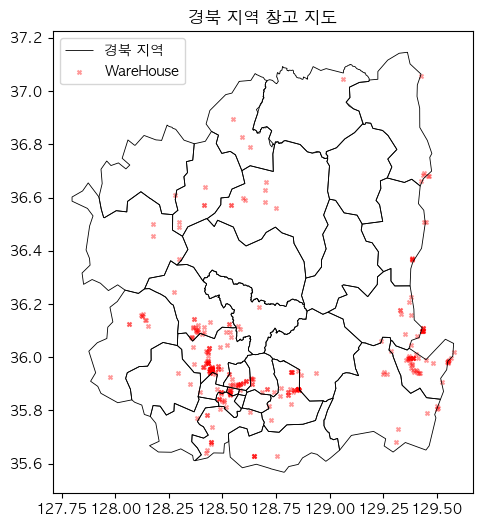

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.geometry import Point

# Create a GeoDataFrame for the points
points_geometry_warehouse = gpd.GeoDataFrame(geometry=[Point(xy) for xy in zip(gb_df['경도'], gb_df['위도'])], crs="EPSG:4326")

# Create a GeoDataFrame for the polygons
merged_geometry = gpd.GeoDataFrame(geometry=[], crs="EPSG:4326")

# Add polygons to the GeoDataFrame
# 경북 지역 시군구 폴리곤 좌표
for i in range(82, 105):
    for j in range(0, len(sigGeo['features'][i]['geometry']['coordinates'])):
        merged_geometry = pd.concat([merged_geometry, gpd.GeoDataFrame(geometry=[Polygon(Polygon(sigGeo['features'][i]['geometry']['coordinates'][j]))], crs="EPSG:4326")])

# 대구 지역 시군구 폴리곤 좌표
for i in range(111, 119):
    for j in range(0, len(sigGeo['features'][i]['geometry']['coordinates'])):
        merged_geometry = pd.concat([merged_geometry, gpd.GeoDataFrame(geometry=[Polygon(Polygon(sigGeo['features'][i]['geometry']['coordinates'][j]))], crs="EPSG:4326")])

        
# Matplotlib로 지도 그리기
fig, ax = plt.subplots(figsize=(6,6))
merged_geometry.boundary.plot(ax=ax, linewidth=0.6, color='black', label='경북 지역')
points_geometry_warehouse.plot(ax=ax, color='red', marker='x', alpha=0.4, markersize=8, label='WareHouse')
ax.set_title("경북 지역 창고 지도")

# for i in range(len(gb_df)): # 행 개수만큼 순회
#     row = gb_df.iloc[i] # 한 행씩 꺼내기
#     name = f"{row['상호명']},{row['창고규모 합(m²)']}m²" # 이름이 저장된 열
#     x = float(row['경도']) # x좌표가 저장된 열
#     y = float(row['위도']) # y좌표가 저장된 열

#     plt.text(x, y, name, fontsize=7) # x 좌표, y좌표, 이름 순서로 input 지정


plt.legend()
plt.show()
